In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot, aes, geom_point, labs

In [ ]:
# Read the data
ames = pd.read_csv("AmesHousing.csv")

# Get rid of columns with mostly NaN values
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]

# Drop other NAs
ames = ames.dropna()

- handle_unknown = 'ignore' means don't predict on data that doesn't fit into the OneHotEncoded dummy variables, should always be there from now on
- drop unique ID's because they would get treated as numerical variables and you can't predict based on unique IDs

In [ ]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

In [ ]:
cross_val_score(lr_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([-4.59217770e+20, -1.21723181e+20, -8.37868327e+19, -9.71584476e+20,
       -3.78389822e+20])

In [ ]:
lr_fitted = lr_pipeline_1.fit(X, y)

In [ ]:
lr_coefs = lr_fitted.named_steps['linear_regression'].coef_

In [ ]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(1))]
)

In [ ]:
cross_val_score(ridge_pipeline_1, X, y, cv = 5, scoring = 'r2')

array([0.8983804 , 0.91749817, 0.79251623, 0.78248152, 0.91492025])

In [ ]:
ridge_fitted = ridge_pipeline_1.fit(X, y)

In [ ]:
ridge_coefs = ridge_fitted.named_steps['ridge_regression'].coef_

In [ ]:
coefs_df = pd.DataFrame({"LinearRegressionCoefs" : lr_coefs,
                         "RidgeRegressionCoefs" : ridge_coefs})

In [ ]:
coefs_df

LinearRegressionCoefs  RidgeRegressionCoefs
0            -6.831270e+13          -5740.055372
1            -6.831270e+13           1511.928887
2            -6.831270e+13          -5809.704488
3            -6.831270e+13           7676.327583
4            -6.831270e+13           3215.393618
..                     ...                   ...
254           2.708000e+03           2937.762099
255           2.714000e+03           1377.194605
256          -5.204000e+03          -4485.971545
257          -6.960000e+02           -674.189275
258          -6.880000e+02           -905.496080

[259 rows x 2 columns]

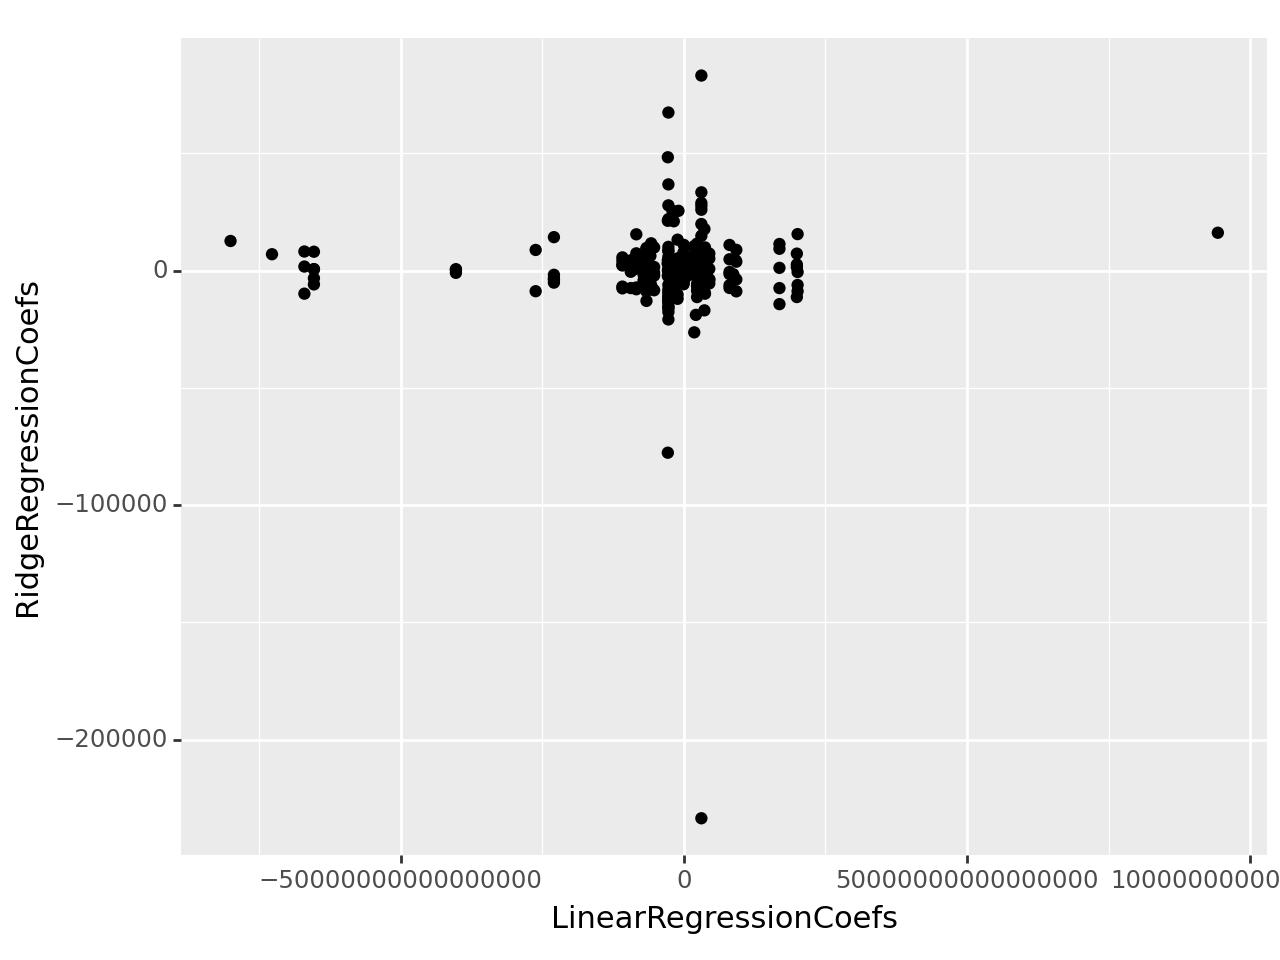

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(coefs_df,
aes(
  x = "LinearRegressionCoefs",
  y = "RidgeRegressionCoefs"
))
+ geom_point()
)

In [ ]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge())]
)

In [ ]:
alphas = {"ridge_regression__alpha" : [0.01, 0.1, 1, 10, 100]}
gscv = GridSearchCV(ridge_pipeline_1, alphas, cv = 5, scoring = "r2")

In [ ]:
gscv_fitted = gscv.fit(X, y)

In [ ]:
gscv_fitted.cv_results_['mean_test_score']

array([0.85322362, 0.85542319, 0.86115931, 0.86335485, 0.85712911])

In [ ]:
pd.DataFrame(data = {"alphas": [0.01, 0.1, 1, 10, 100], "scores": gscv_fitted.cv_results_['mean_test_score']})

alphas    scores
0    0.01  0.853224
1    0.10  0.855423
2    1.00  0.861159
3   10.00  0.863355
4  100.00  0.857129

In [ ]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

ridge_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("ridge_regression", Ridge(10))]
)

In [ ]:
ridge_fitted = ridge_pipeline_1.fit(X, y)

In [ ]:
ridge_coefs_alpha_10 = ridge_fitted.named_steps['ridge_regression'].coef_

In [ ]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso())]
)

In [ ]:
alphas = {"lasso_regression__alpha" : [0.01, 0.1, 1, 10, 100]}
gscv = GridSearchCV(lasso_pipeline_1, alphas, cv = 5, scoring = "r2")

In [ ]:
gscv_fitted = gscv.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.104e+11, tolerance: 1.348e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.099e+11, tolerance: 1.474e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.963e+11, tolerance: 1.463e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.p

In [ ]:
gscv_fitted.cv_results_['mean_test_score']

array([0.85454916, 0.85539429, 0.85589007, 0.85949508, 0.86617023])

In [ ]:
pd.DataFrame(data = {"alphas": [0.01, 0.1, 1, 10, 100], "scores": gscv_fitted.cv_results_['mean_test_score']})

alphas    scores
0    0.01  0.854549
1    0.10  0.855394
2    1.00  0.855890
3   10.00  0.859495
4  100.00  0.866170

In [ ]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lasso_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("lasso_regression", Lasso(100))]
)

In [ ]:
lasso_fitted = lasso_pipeline_1.fit(X, y)

In [ ]:
lasso_coefs_alpha_100 = lasso_fitted.named_steps['lasso_regression'].coef_

In [ ]:
coefs_df_2 = pd.DataFrame({"LassoRegressionCoefs" : lasso_coefs_alpha_100,
                         "RidgeRegressionCoefs" : ridge_coefs_alpha_10})

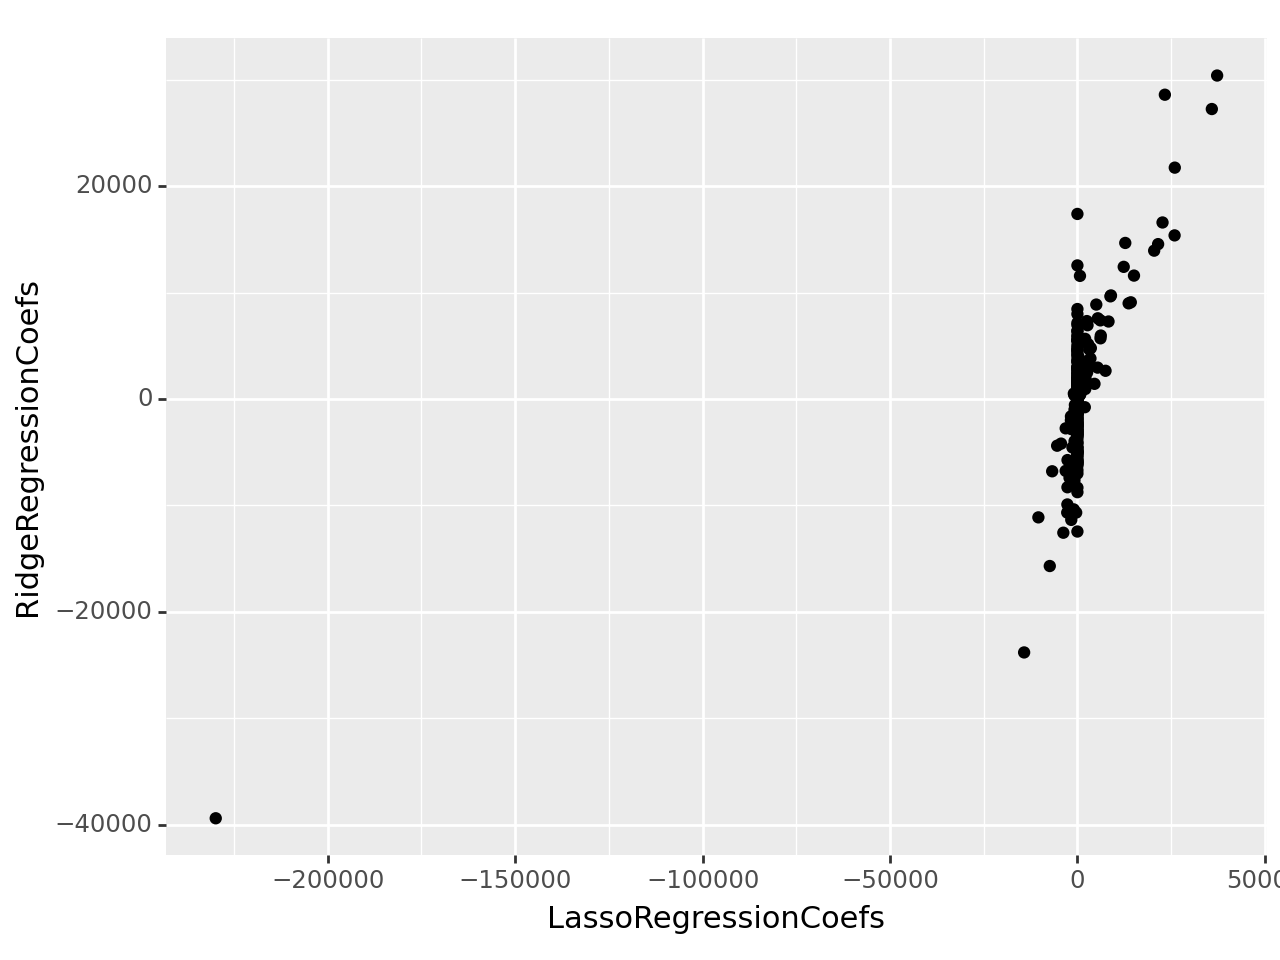

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(coefs_df_2,
aes(
  x = "LassoRegressionCoefs",
  y = "RidgeRegressionCoefs"
))
+ geom_point()
)

In [ ]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]


ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

elastic_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet())]
)

In [ ]:
tune = {'elastic_regression__alpha' : [0.01, 0.1, 1, 10, 100],
        'elastic_regression__l1_ratio' : [0.25, 0.5, 0.75, 1]}

In [ ]:
gscv = GridSearchCV(elastic_pipeline_1, tune, cv = 5, scoring = "r2")

In [ ]:
gscv_fitted = gscv.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.230e+09, tolerance: 1.474e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.607e+09, tolerance: 1.463e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.189e+09, tolerance: 1.407e+09
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.p

In [ ]:
gscv_fitted.cv_results_['mean_test_score']

array([0.86311598, 0.8633424 , 0.86317964, 0.85454916, 0.85360126,
       0.85638898, 0.86005811, 0.85539429, 0.82096345, 0.83061632,
       0.84182323, 0.85589007, 0.59989949, 0.67388676, 0.75869355,
       0.85949508, 0.13253676, 0.18970671, 0.32281332, 0.86617023])

In [ ]:
results_df = pd.DataFrame(gscv_fitted.cv_results_)
results_df = results_df[["param_elastic_regression__alpha", "param_elastic_regression__l1_ratio", "mean_test_score", "rank_test_score"]]
results_df.sort_values("rank_test_score", ascending = True)

param_elastic_regression__alpha param_elastic_regression__l1_ratio  \
19                             100                                  1   
1                             0.01                                0.5   
2                             0.01                               0.75   
0                             0.01                               0.25   
6                              0.1                               0.75   
15                              10                                  1   
5                              0.1                                0.5   
11                               1                                  1   
7                              0.1                                  1   
3                             0.01                                  1   
4                              0.1                               0.25   
10                               1                               0.75   
9                                1                                0.5   
8                                1                               0.25   
14                              10                               0.75   
13                              10                                0.5   
12                              10                               0.25   
18                             100                               0.75   
17                             100                                0.5   
16                             100                               0.25   

    mean_test_score  rank_test_score  
19         0.866170                1  
1          0.863342                2  
2          0.863180                3  
0          0.863116                4  
6          0.860058                5  
15         0.859495                6  
5          0.856389                7  
11         0.855890                8  
7          0.855394                9  
3          0.854549               10  
4          0.853601               11  
10         0.841823               12  
9          0.830616               13  
8          0.820963               14  
14         0.758694               15  
13         0.673887               16  
12         0.599899               17  
18         0.322813               18  
17         0.189707               19  
16         0.132537               20

In [ ]:
elastic_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("elastic_regression", ElasticNet(alpha = 100, l1_ratio= 1))]
)

In [ ]:
elastic_fitted = elastic_pipeline_1.fit(X, y)

In [ ]:
elastic_coefs = elastic_fitted.named_steps['elastic_regression'].coef_

In [ ]:
coefs_df_3 = pd.DataFrame({"LassoRegressionCoefs" : lasso_coefs_alpha_100,
                         "ElasticRegressionCoefs" : elastic_coefs})

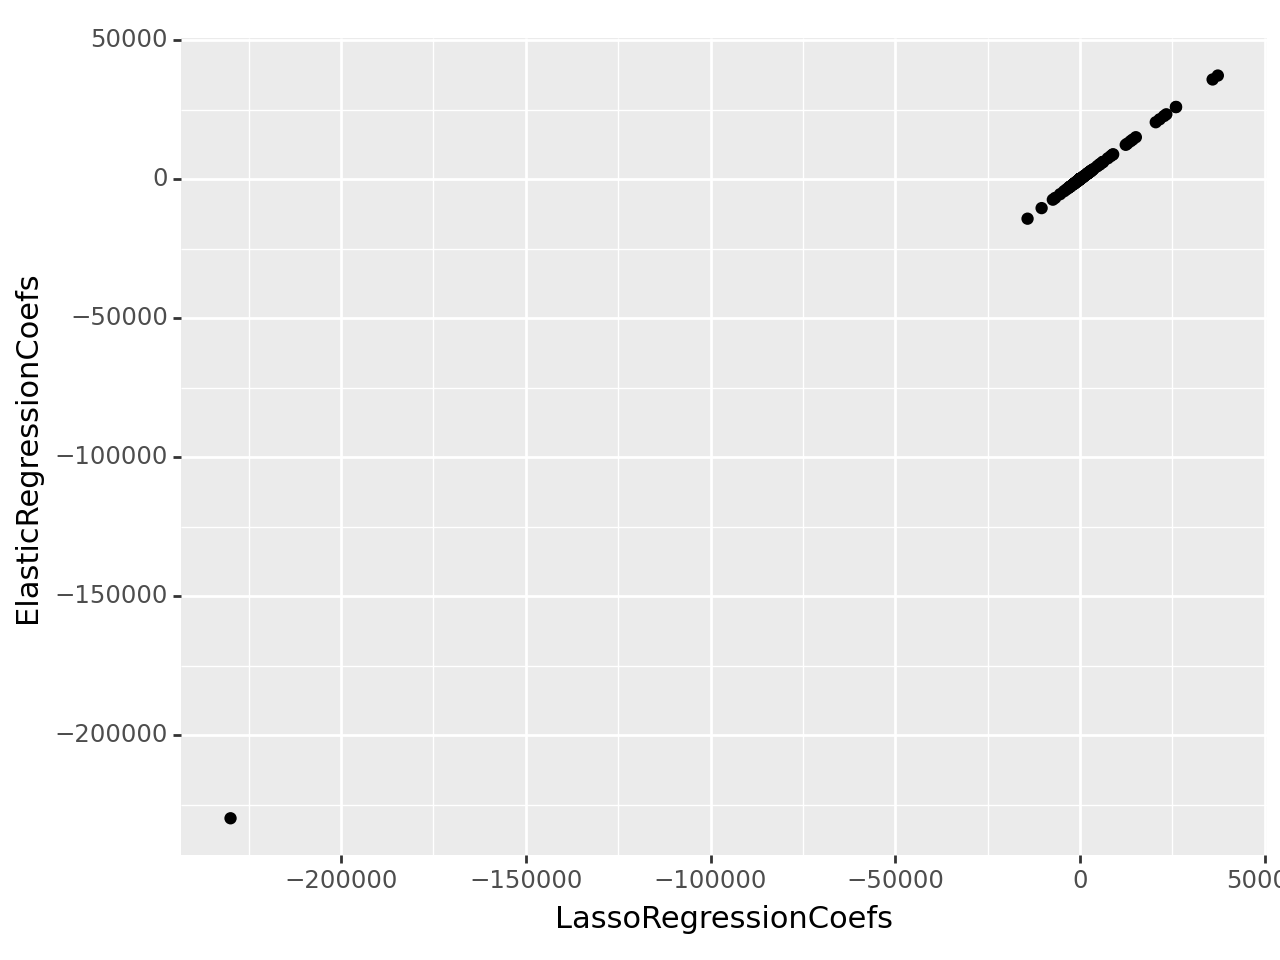

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(coefs_df_3,
aes(
  x = "LassoRegressionCoefs",
  y = "ElasticRegressionCoefs"
))
+ geom_point()
)